In [1]:
# Allow Jupyter Notebook to import parent modules
import os, sys
rec_agg = os.path.abspath('')
root = os.path.dirname(rec_agg)
print(root)
if not root in sys.path: sys.path.append(root)

/Users/yenshuohsu/GaTech/Spring 2024/Create X/Saucier_API/api/services


In [2]:
# imports
import json
from schemas import *
from util.GraphDrawer import *
from scheduler import *
from kunal_test import *
from Recipe_To_Gantt.recipe_url_to_json import *

In [3]:
# Reads in recipes
recipe_data_url = "../../Intermediate Representations/"

with open(recipe_data_url + "new_AM Intermediate Representation.json") as f:
    try:
        am_rec = json.load(f)
    except json.JSONDecodeError:
        print("Invalid JSON format.")
    
    print(json.dumps(am_rec, indent=2, ensure_ascii=False)[:200] + "...")
with open(recipe_data_url + "new_KD Intermediate Representation.json") as f:
    try:
        kd_rec = json.load(f)
    except json.JSONDecodeError:
        print("Invalid JSON format.")
    print(json.dumps(kd_rec, indent=2, ensure_ascii=False)[:200] + "...") 



[
  {
    "recipe_id": "1",
    "name": "Basic Crêpes",
    "description": "This simple but delicious crêpe recipe can be made in minutes from ingredients that everyone has on hand.",
    "ingredients...
[
  {
    "recipe_id": "1",
    "name": "Salted Margarita Bars",
    "description": "",
    "ingredients": [
      "butter",
      "saltine crackers",
      "melted butter",
      "granulated sugar",
...


In [4]:
# recipes = []

# url1 = 'https://www.allrecipes.com/recipe/150637/better-baked-beans/'
# url2 = ''
# url3 = ''


# baseRecipe = convert_recipe_to_custom_format(extract_recipe_from_webpage(url1), "")
# print(baseRecipe)

In [5]:
# print(type(baseRecipe))
# converted = json.loads(baseRecipe)
# print(type(converted))

# recipe_1 = Recipe()
# recipe_1.parse(converted)

# recipes.append(recipe_1)
# #recipeScheduler(recipes)

In [6]:
# Parses all recipes and builds their respective graphs
dum_recipe = kd_rec[0]
dum2_recipe = kd_rec[1]

recipe_obj = Recipe()
recipe_obj2 = Recipe()

recipe_obj.parse(dum_recipe)
recipe_obj2.parse(dum2_recipe)

print(recipe_obj)
print(recipe_obj2)

#print(recipe_obj.steps[0].ingredients[0])

Recipe: Salted Margarita Bars
Preptime: 2700
Cooktime: 8100
Steps: 
	Salted Margarita Bars-1: Heat the oven to 350 degrees. | Takes 600
	Salted Margarita Bars-2: Grease a 9-inch square baking pan with butter | Takes 2400
	Salted Margarita Bars-3: Make the crust | Takes 2400
	Salted Margarita Bars-4: Prepare the crust for freezing | Takes 120
	Salted Margarita Bars-5: Freeze the crust | Takes 900
	Salted Margarita Bars-6: Bake the crust | Takes 1020
	Salted Margarita Bars-7: Make the filling | Takes 300
	Salted Margarita Bars-8: Combine the filling with crust | Takes 300
	Salted Margarita Bars-9: Bake the filling with crust | Takes 960
	Salted Margarita Bars-10: Transfer to rack to cool | Takes 7200
	Salted Margarita Bars-11: Cut individual bars | Takes 10
Ingredients: ['butter', 'saltine crackers', 'melted butter', 'granulated sugar', 'kosher salt', 'egg yolks', 'condensed milk', 'lime zest', 'lime juice', 'tequila', 'orange liqueur', 'salt', 'flaky salt']

Recipe: Fettucine with Aspar

In [7]:
recipe_obj.create_graph()
recipe_obj2.create_graph()

Step Salted Margarita Bars-1 (Inactive): Heat the oven to 350 degrees.
Step Salted Margarita Bars-7 (Active): Make the filling
Step Fettucine with Asparagus-1 (Inactive): Boil a pot of water
Step Fettucine with Asparagus-2 (Active): Cut asparagus
Step Salted Margarita Bars-2 (Active): Grease a 9-inch square baking pan with butter
Step Fettucine with Asparagus-3 (Active): Rinse asparagus
Step Salted Margarita Bars-3 (Active): Make the crust
Step Fettucine with Asparagus-4 (Active): Boil asparagus
Step Salted Margarita Bars-4 (Active): Prepare the crust for freezing
Step Fettucine with Asparagus-5 (Inactive): Cook fettucine
Step Salted Margarita Bars-5 (Inactive): Freeze the crust
Step Fettucine with Asparagus-6 (Active): Drain fettucine
Step Salted Margarita Bars-6 (Inactive): Bake the crust
Step Fettucine with Asparagus-7 (Active): Cook everything together
Step Salted Margarita Bars-8 (Active): Combine the filling with crust
Step Salted Margarita Bars-9 (Inactive): Bake the filling wit

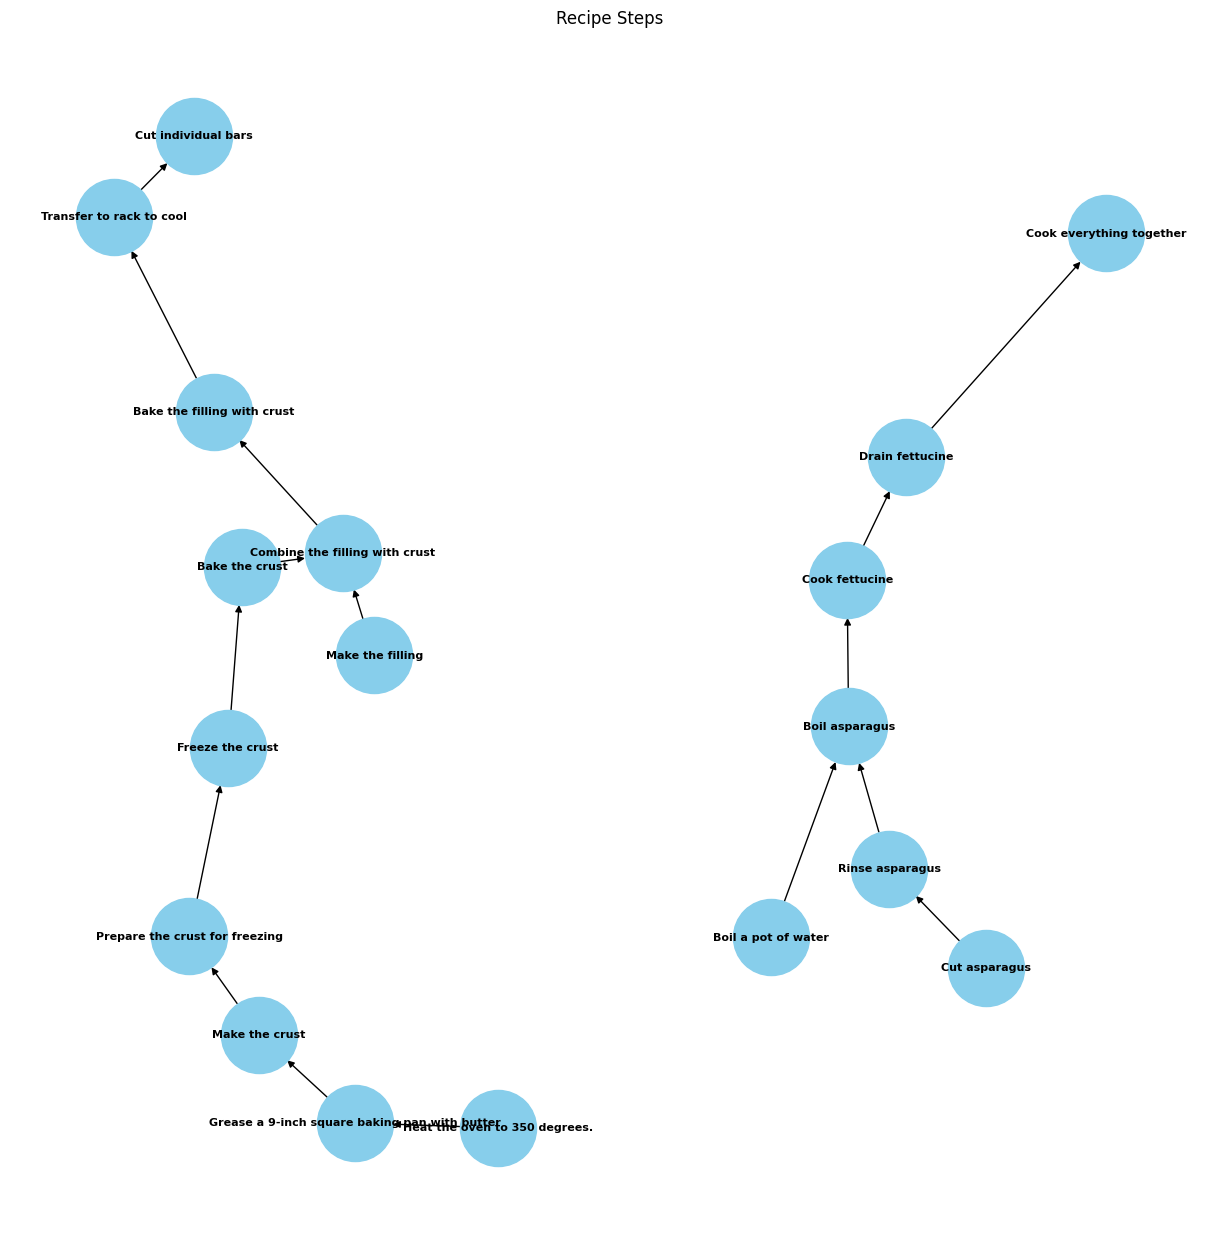

In [8]:
list = [recipe_obj, recipe_obj2]

graph = build_dag_and_schedule_steps(list)
create_and_show_graph(list)


# scheduler = RecipeScheduler(list)
# scheduler.schedule()


# recipe_scheduler(list)

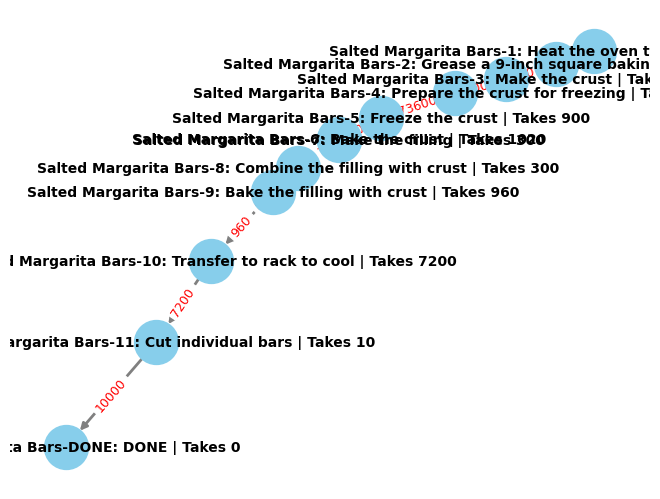

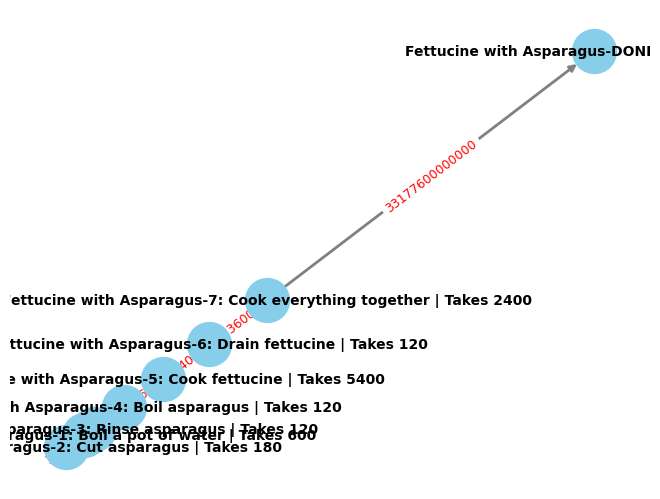

 t = 180 | Fettucine with Asparagus-2 is done
 t = 300 | Fettucine with Asparagus-3 is done
 t = 600 | Salted Margarita Bars-7 is done
 t = 600 | Salted Margarita Bars-1 is done after some wait
 t = 600 | Fettucine with Asparagus-1 is done after some wait
 t = 720 | Fettucine with Asparagus-4 is done
 t = 3120 | Salted Margarita Bars-2 is done
 t = 5520 | Salted Margarita Bars-3 is done
 t = 5640 | Salted Margarita Bars-4 is done
 t = 5640 | Fettucine with Asparagus-5 is done after some wait
 t = 6240 | Fettucine with Asparagus-6 is done
 t = 6240 | Salted Margarita Bars-5 is done in the background
 t = 8640 | Fettucine with Asparagus-7 is done
 t = 8640 | Salted Margarita Bars-6 is done after some wait
 t = 9960 | Salted Margarita Bars-8 is done
 t = 9960 | Salted Margarita Bars-9 is done after some wait
 t = 10920 | Salted Margarita Bars-10 is done after some wait
 t = 18130 | Salted Margarita Bars-11 is done


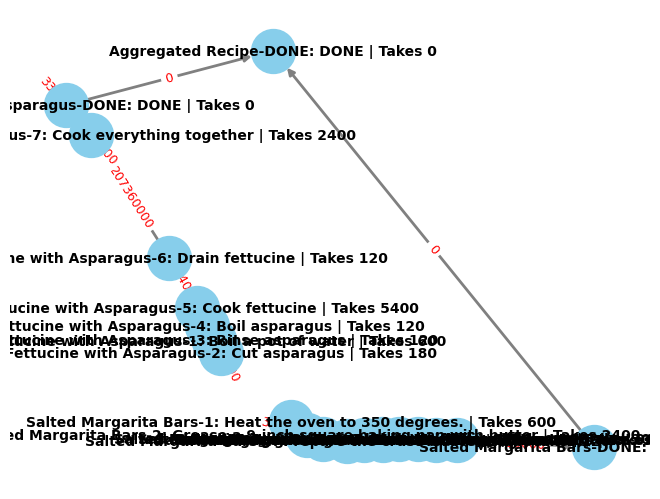

Final Timeline:
Time Spent: 18130
Summation of Recipe Time 25150
Fettucine with Asparagus-2: Cut asparagus | Takes 180
Fettucine with Asparagus-3: Rinse asparagus | Takes 120
Salted Margarita Bars-7: Make the filling | Takes 300
Salted Margarita Bars-1: Heat the oven to 350 degrees. | Takes 600
Fettucine with Asparagus-1: Boil a pot of water | Takes 600
Fettucine with Asparagus-4: Boil asparagus | Takes 120
Salted Margarita Bars-2: Grease a 9-inch square baking pan with butter | Takes 2400
Salted Margarita Bars-3: Make the crust | Takes 2400
Salted Margarita Bars-4: Prepare the crust for freezing | Takes 120
Fettucine with Asparagus-5: Cook fettucine | Takes 5400
Fettucine with Asparagus-6: Drain fettucine | Takes 120
Salted Margarita Bars-5: Freeze the crust | Takes 900
Fettucine with Asparagus-7: Cook everything together | Takes 2400
Salted Margarita Bars-6: Bake the crust | Takes 1020
Salted Margarita Bars-8: Combine the filling with crust | Takes 300
Salted Margarita Bars-9: Bake t

'"{\\"recipe_id\\": \\"undefined\\", \\"name\\": \\"Aggregated Recipe\\", \\"schedules\\": null, \\"description\\": \\"\\", \\"steps\\": [{\\"step_id\\": \\"Fettucine with Asparagus-2\\", \\"order_id\\": 2, \\"name\\": \\"Cut asparagus\\", \\"ingredients\\": [{\\"name\\": \\"asparagus spear\\", \\"amount\\": 0.5, \\"unit\\": \\"pound\\"}], \\"hardware\\": [\\"knife\\"], \\"active\\": 1, \\"dependency\\": [], \\"time\\": 180, \\"description\\": \\"Cut off tough ends of asparagus spears. Cut each on the bias into 1-inch lengths. There should be about 1\\\\u00bd cups.\\"}, {\\"step_id\\": \\"Fettucine with Asparagus-3\\", \\"order_id\\": 3, \\"name\\": \\"Rinse asparagus\\", \\"ingredients\\": [], \\"hardware\\": [\\"colander\\"], \\"active\\": 1, \\"dependency\\": [\\"Fettucine with Asparagus-2\\"], \\"time\\": 120, \\"description\\": \\"Rinse well and drain.\\"}, {\\"step_id\\": \\"Salted Margarita Bars-7\\", \\"order_id\\": 7, \\"name\\": \\"Make the filling\\", \\"ingredients\\": [{\\

In [9]:
recipe_scheduler(list)